In [1]:
import time
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.serif"] = 'Times'
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"
#plt.rcParams['text.usetex'] = True
import numpy as np
from copy import deepcopy

from DataAnalysis import DataAnalysis
#%run new_DataAnalysis.ipynb|
from MonteCarlo import MonteCarlo
from Helper import *


In [2]:
mc = MonteCarlo(num_tracks=1, track_type="sasso", particle_type="muon")
mc.filter_fit(100, 3)
mc.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster,Hit,PathLength,dEdx
0,0,722,7924.00,1,3.2,3.2,22044.908028,0.0,0.0,0.0,False,0,7927.20,0,True,24.407065,903.218322
1,0,723,7924.01,1,3.2,3.2,3728.285943,0.0,0.0,0.0,False,0,7927.21,0,True,4.878789,764.182590
2,0,732,7924.02,1,3.2,3.2,32682.920411,0.0,0.0,0.0,False,0,7927.22,0,True,45.010398,726.119334
3,0,733,7924.03,1,3.2,3.2,970.733799,0.0,0.0,0.0,False,0,7927.23,0,True,1.188107,817.042434
4,0,746,7924.04,1,3.2,3.2,7180.427906,0.0,0.0,0.0,False,0,7927.24,0,True,7.737061,928.056242
5,0,759,7924.05,1,3.2,3.2,25419.087846,0.0,0.0,0.0,False,0,7927.25,0,True,27.890559,911.386803
6,0,760,7924.06,1,3.2,3.2,37464.154477,0.0,0.0,0.0,False,0,7927.26,0,True,47.087520,795.628114


In [3]:
def getTestDataframes(df_mc, saturation_cap):
    df_perfect = df_mc.copy()
    df_perfect.drop(['dEdx', 'PathLength', 'Hit'], axis=1, inplace=True)
#     del df_mc['dEdx']
#     del df_mc['PathLength']
#     del df_mc['Hit']

    df_ideal = df_perfect.copy()    
    energies = np.array(df_mc['SelectedEnergy'])
    energies_with_noise = energies + \
        (energies < saturation_cap) * np.random.normal(0,10,len(energies)) + \
        (energies >= saturation_cap) * np.random.normal(0, energies * .10, len(energies))
    df_ideal['SelectedEnergy'] = energies_with_noise
    
    df_cuore = df_ideal.copy()
    df_cuore['IsSaturated'] = df_cuore['SelectedEnergy'] >= saturation_cap
    
    return (df_perfect, df_ideal, df_cuore)

df_perfect, df_ideal, df_cuore = getTestDataframes(mc.get_eventdf(), 20000)


In [4]:
df_perfect

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster
0,0,722,7924.00,1,3.2,3.2,22044.908028,0.0,0.0,0.0,False,0,7927.20,0
1,0,723,7924.01,1,3.2,3.2,3728.285943,0.0,0.0,0.0,False,0,7927.21,0
2,0,732,7924.02,1,3.2,3.2,32682.920411,0.0,0.0,0.0,False,0,7927.22,0
3,0,733,7924.03,1,3.2,3.2,970.733799,0.0,0.0,0.0,False,0,7927.23,0
4,0,746,7924.04,1,3.2,3.2,7180.427906,0.0,0.0,0.0,False,0,7927.24,0
5,0,759,7924.05,1,3.2,3.2,25419.087846,0.0,0.0,0.0,False,0,7927.25,0
6,0,760,7924.06,1,3.2,3.2,37464.154477,0.0,0.0,0.0,False,0,7927.26,0


In [5]:
df_ideal

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster
0,0,722,7924.00,1,3.2,3.2,22886.663662,0.0,0.0,0.0,False,0,7927.20,0
1,0,723,7924.01,1,3.2,3.2,3750.775507,0.0,0.0,0.0,False,0,7927.21,0
2,0,732,7924.02,1,3.2,3.2,32827.808386,0.0,0.0,0.0,False,0,7927.22,0
3,0,733,7924.03,1,3.2,3.2,985.260875,0.0,0.0,0.0,False,0,7927.23,0
4,0,746,7924.04,1,3.2,3.2,7175.773385,0.0,0.0,0.0,False,0,7927.24,0
5,0,759,7924.05,1,3.2,3.2,24431.598915,0.0,0.0,0.0,False,0,7927.25,0
6,0,760,7924.06,1,3.2,3.2,40869.709219,0.0,0.0,0.0,False,0,7927.26,0


In [6]:
df_cuore

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster
0,0,722,7924.00,1,3.2,3.2,22886.663662,0.0,0.0,0.0,True,0,7927.20,0
1,0,723,7924.01,1,3.2,3.2,3750.775507,0.0,0.0,0.0,False,0,7927.21,0
2,0,732,7924.02,1,3.2,3.2,32827.808386,0.0,0.0,0.0,True,0,7927.22,0
3,0,733,7924.03,1,3.2,3.2,985.260875,0.0,0.0,0.0,False,0,7927.23,0
4,0,746,7924.04,1,3.2,3.2,7175.773385,0.0,0.0,0.0,False,0,7927.24,0
5,0,759,7924.05,1,3.2,3.2,24431.598915,0.0,0.0,0.0,True,0,7927.25,0
6,0,760,7924.06,1,3.2,3.2,40869.709219,0.0,0.0,0.0,True,0,7927.26,0


In [7]:
test1 = DataAnalysis()
start = time.time()
test1.set_eventdf(df_perfect)

#test.arrange_clusters(3, 1.0) # >= 5 events, <= 1.0 seconds
test1.make_clusterdf(pop_num=200, gen_num=50, verbose=True, save_pareto=False)

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |       2 |            - |            -
    2 |     400 |       3 |  0.059674742 |        ideal
    3 |     600 |       3 |  0.037492848 |        ideal
    4 |     800 |       4 |  0.076271674 |        ideal
    5 |    1000 |       7 |  0.016295635 |        ideal
    6 |    1200 |       9 |  0.018387934 |        ideal
    7 |    1400 |       9 |  0.058614977 |        ideal
    8 |    1600 |      16 |  0.009388537 |        ideal
    9 |    1800 |      15 |  0.006320634 |        ideal
   10 |    2000 |      21 |  0.003324987 |        ideal
   11 |    2200 |      24 |  0.023836312 |        nadir
   12 |    2400 |      31 |  0.676458228 |        nadir
   13 |    2600 |      40 |  0.013606426 |        ideal
   14 |    2800 |      42 |  0.002731689 |        ideal
   15 |    3000 |      51 |  0.008560339 |            f
   16 |    3200 |      56 |  0.098156473 |        nadir
   17 |    3400 |      59 |  0.002971870 |      

  147 |   29400 |     200 |  0.000200291 |            f
  148 |   29600 |     200 |  0.000181414 |            f
  149 |   29800 |     200 |  0.000176428 |            f
  150 |   30000 |     200 |  0.046779314 |        nadir
  151 |   30200 |     200 |  0.000185053 |            f
  152 |   30400 |     200 |  0.000267319 |            f
  153 |   30600 |     200 |  0.000201438 |            f
  154 |   30800 |     200 |  0.000228926 |            f
  155 |   31000 |     200 |  0.000159097 |            f
  156 |   31200 |     200 |  0.000147626 |            f
  157 |   31400 |     200 |  0.000189218 |            f
  158 |   31600 |     200 |  0.000195788 |            f
  159 |   31800 |     200 |  0.000082723 |            f
  160 |   32000 |     200 |  0.000252840 |            f
  161 |   32200 |     200 |  0.009036049 |        nadir
  162 |   32400 |     200 |  0.000158662 |            f
  163 |   32600 |     200 |  0.000177011 |            f
  164 |   32800 |     200 |  0.000133444 |      

0 0 41.576225293862194
0 0 50.287375308516694
0 0 48.55405993116385
0 0 43.68764622728577
0 0 46.96202361802867
0 0 43.13565235204125
0 0 44.555051306992404
0 0 44.73405635376405
0 0 43.234973122749786
0 0 45.41334655954995
0 0 47.3319338701576
0 0 46.39478384470032
0 0 44.87979255852256
0 0 45.928136109303516
0 0 44.07858649460555
0 0 45.79650404265468
0 0 48.70144764647662
0 0 47.173302432148944
0 0 45.332631419964976
0 0 45.9968165176792
0 0 44.61817776881558
0 0 44.520092585824614
0 0 44.35029253029182
0 0 49.56740391672988
0 0 43.608122943699215
0 0 43.83254647617267
0 0 48.5427526593403
0 0 46.59227014315776
0 0 48.01742990674811
0 0 46.359848848841025
0 0 44.955180402605926
0 0 47.182777809907584
final best:  [ 329.1679291   -95.407307   -172.19779658   -0.50417726   -0.53535575
    0.67764261] 0 0 41.20769694019066


In [8]:
test2 = DataAnalysis()
start = time.time()
test2.set_eventdf(df_ideal)

#test.arrange_clusters(3, 1.0) # >= 5 events, <= 1.0 seconds
test2.make_clusterdf(pop_num=200, gen_num=50, verbose=True, save_pareto=False)

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |       2 |            - |            -
    2 |     400 |       2 |  0.072557682 |        ideal
    3 |     600 |       4 |  0.058542174 |        ideal
    4 |     800 |       8 |  0.122370635 |        ideal
    5 |    1000 |       6 |  0.119093524 |        ideal
    6 |    1200 |      15 |  0.015796779 |        ideal
    7 |    1400 |      19 |  0.003177628 |        ideal
    8 |    1600 |      19 |  0.012555245 |            f
    9 |    1800 |      26 |  0.231104819 |        nadir
   10 |    2000 |      29 |  0.074492083 |        nadir
   11 |    2200 |      32 |  0.005382273 |        ideal
   12 |    2400 |      34 |  0.105337257 |        nadir
   13 |    2600 |      37 |  0.006920419 |            f
   14 |    2800 |      40 |  0.009046648 |            f
   15 |    3000 |      50 |  0.003301604 |            f
   16 |    3200 |      54 |  0.374114209 |        nadir
   17 |    3400 |      61 |  0.084985787 |      

  147 |   29400 |     200 |  0.000188289 |            f
  148 |   29600 |     200 |  0.000173416 |            f
  149 |   29800 |     200 |  0.000103709 |            f
  150 |   30000 |     200 |  0.000126051 |            f
  151 |   30200 |     200 |  0.000121855 |            f
  152 |   30400 |     200 |  0.000229003 |            f
  153 |   30600 |     200 |  0.000117258 |            f
  154 |   30800 |     200 |  0.000148819 |            f
  155 |   31000 |     200 |  0.000179661 |            f
  156 |   31200 |     200 |  0.000140406 |            f
  157 |   31400 |     200 |  0.000085031 |            f
  158 |   31600 |     200 |  0.000148562 |            f
  159 |   31800 |     200 |  0.000099811 |            f
  160 |   32000 |     200 |  0.000045628 |            f
  161 |   32200 |     200 |  0.000133480 |            f
  162 |   32400 |     200 |  0.000147161 |            f
  163 |   32600 |     200 |  0.000154280 |            f
  164 |   32800 |     200 |  0.000110883 |      

0 0 48.13849513712081
0 0 42.6929866074919
0 0 46.19937407648875
0 0 50.22527754303043
0 0 43.03594223108946
0 0 49.12464756682168
0 0 44.47423641148322
0 0 45.604772229281004
0 0 49.36706140126512
0 0 42.94335579461689
0 0 47.81524505312536
0 0 45.82596678692156
0 0 43.16275178968815
0 0 44.01140672855619
0 0 48.70106117040162
0 0 46.74231509738131
0 0 46.77761038202804
0 0 47.01345658932195
0 0 45.69713500825618
0 0 48.96733124158692
0 0 47.81432634102926
0 0 44.911779842972045
0 0 45.77927281687662
0 0 41.567152769247855
0 0 47.41725991847135
0 0 43.96011569649931
0 0 49.70920808760514
0 0 43.673375277357835
0 0 46.02520145955243
0 0 44.30224829109643
final best:  [ 314.55048218 -111.09397937 -152.23304391   -0.50489735   -0.5325616
    0.67930612] 0 0 40.74636000206927


In [9]:
test3 = DataAnalysis()
start = time.time()
test3.set_eventdf(df_cuore)

#test.arrange_clusters(3, 1.0) # >= 5 events, <= 1.0 seconds
test3.make_clusterdf(pop_num=200, gen_num=50, verbose=True, save_pareto=False)

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |       1 |            - |            -
    2 |     400 |       2 |  1.000000000 |        ideal
    3 |     600 |       3 |  0.209815850 |        ideal
    4 |     800 |       7 |  0.109205414 |        ideal
    5 |    1000 |       6 |  0.157046110 |        ideal
    6 |    1200 |       7 |  0.009870839 |        ideal
    7 |    1400 |      11 |  0.033888011 |            f
    8 |    1600 |      14 |  0.022225948 |        ideal
    9 |    1800 |      19 |  0.018774307 |            f
   10 |    2000 |      19 |  0.025854037 |        ideal
   11 |    2200 |      22 |  0.187242099 |        nadir
   12 |    2400 |      18 |  0.313257876 |        nadir
   13 |    2600 |      26 |  0.011180087 |            f
   14 |    2800 |      33 |  0.008830694 |            f
   15 |    3000 |      39 |  0.183478375 |        nadir
   16 |    3200 |      41 |  0.006317884 |            f
   17 |    3400 |      50 |  0.003531548 |      

  146 |   29200 |     200 |  0.000211998 |            f
  147 |   29400 |     200 |  0.020704683 |        nadir
  148 |   29600 |     200 |  0.000092078 |            f
  149 |   29800 |     200 |  0.000137602 |            f
  150 |   30000 |     200 |  0.000142524 |            f
  151 |   30200 |     200 |  0.000124039 |            f
  152 |   30400 |     200 |  0.000168961 |            f
  153 |   30600 |     200 |  0.000169381 |            f
  154 |   30800 |     200 |  0.000127022 |            f
  155 |   31000 |     200 |  0.000159555 |            f
  156 |   31200 |     200 |  0.000032744 |            f
  157 |   31400 |     200 |  0.000207168 |            f
  158 |   31600 |     200 |  0.000228901 |            f
  159 |   31800 |     200 |  0.000137816 |            f
  160 |   32000 |     200 |  0.000128505 |            f
  161 |   32200 |     200 |  0.000185391 |            f
  162 |   32400 |     200 |  0.000210391 |            f
  163 |   32600 |     200 |  0.000084811 |      

0 0 26.355333999150343
0 0 27.094720673768922
0 0 31.055041429429643
0 0 26.131059159405815
0 0 26.087290261737166
0 0 28.946856870845412
0 0 28.346116603642006
0 0 27.42263816435366
0 0 28.535281516777943
0 0 28.316945307288268
0 0 28.30247413712787
0 0 29.957099863021003
0 0 27.026119706356834
0 0 30.306390824103968
0 0 27.491165421687825
0 0 29.078870205092745
0 0 30.38479663567673
0 0 30.88097518966054
0 0 26.25286909020265
0 0 30.849625171246032
0 0 26.028570311009034
0 0 28.123910383999803
0 0 27.88337455818444
0 0 30.47787625344776
0 0 27.12160009518667
0 0 27.202918159284266
0 0 26.601304004937457
0 0 30.011944711648503
0 0 26.712044301839107
0 0 28.92709471109343
0 0 26.379629897772993
0 0 31.35755143220222
0 0 28.070119429019684
0 0 28.34599465370923
0 0 28.519354703289395
0 0 29.999748549880117
0 0 30.188990626162784
0 0 27.883132593334416
0 0 27.539543397617347
0 0 26.89542397543017
0 0 28.317910950331225
0 0 26.003409893623385
0 0 30.57302240824475
0 0 31.24011411172227
0 

In [10]:
mc.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,7927.2,0.06,1.130943,0.817742,0.27936,0,0,-14.763355,"[225.864197, -220.053857, -28.683972, -0.44671..."


In [12]:
test1.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,7927.2,0.06,1.016818,0.826244,0.182875,0,0,-41.207582,"[329.167929, -95.407307, -172.197797, -0.50417..."


In [13]:
test2.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,7927.2,0.06,1.01489,0.82398,0.179551,0,0,-40.746244,"[314.550482, -111.093979, -152.233044, -0.5048..."


In [16]:
test3.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,7927.2,0.06,1.020634,0.839986,0.174562,0,0,-43.099382,"[315.554786, -110.3488, -152.466461, -0.515002..."


(0.0, 80.0)

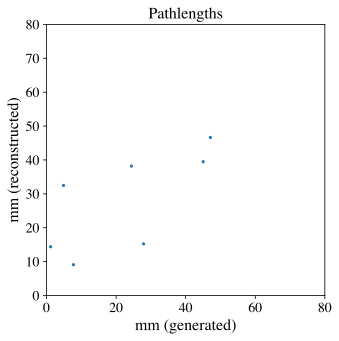

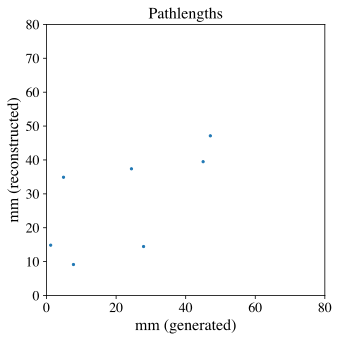

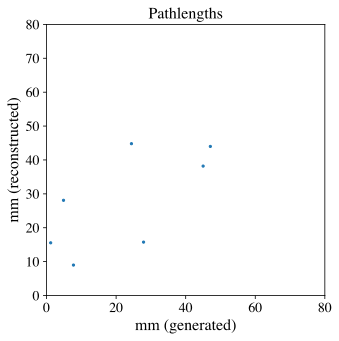

In [15]:
plt.figure(figsize=(5,5))
plt.title("Pathlengths")
plt.scatter( np.array(mc.get_eventdf()['PathLength']), np.array(test1.get_eventdf()['PathLength']), s=5)
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)

plt.figure(figsize=(5,5))
plt.title("Pathlengths")
plt.scatter( np.array(mc.get_eventdf()['PathLength']), np.array(test2.get_eventdf()['PathLength']), s=5)
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)


plt.figure(figsize=(5,5))
plt.title("Pathlengths")
plt.scatter( np.array(mc.get_eventdf()['PathLength']), np.array(test3.get_eventdf()['PathLength']), s=5)
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)

In [ ]:
test.get_eventdf()

In [ ]:
np.random.normal(0,1)

In [ ]:
dist = np.random.normal(10,2.5,100)
plt.hist(dist, np.linspace(-20,20,40))

x = dist + (dist <= 10) * np.random.normal(-2,0,100) + (dist > 10) * np.random.normal(2,0,100)
plt.figure()
plt.hist(x, np.linspace(-20,20,40))